# Тема «POS-tagger и NER»

## Задание 1. Написать теггер на данных с русским языком
1. Проверить UnigramTagger, BigramTagger, TrigramTagger и их комбинации.
2. Написать свой теггер как на занятии, попробовать разные векторайзеры, добавить знание не только букв но и слов
3. Сравнить все реализованные методы, сделать выводы
 
## Задание 2. Проверить, насколько хорошо работает NER
### Данные брать из http://www.labinform.ru/pub/named_entities/
1. Проверить NER из nltk/spacy/deeppavlov.
2. Написать свой NER, попробовать разные подходы:
- передаём в сетку токен и его соседей.
- передаём в сетку только токен.
- свой вариант.
3. Сравнить свои реализованные подходы на качество — вывести precision/recall/f1_score.


In [5]:
! pip install pyconll

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from nltk.tag import DefaultTagger
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger, TrigramTagger
from nltk.tag import RegexpTagger
import pandas as pd
import numpy as np
import pyconll

In [7]:
!wget -O ./ru_syntagrus-ud-train.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-a.conllu -P datasets
!wget -O ./ru_syntagrus-ud-dev.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu -P datasets

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
full_train = pyconll.load_from_file('ru_syntagrus-ud-train.conllu')
full_test = pyconll.load_from_file('ru_syntagrus-ud-dev.conllu')

In [9]:
for sent in full_train[:2]:
    for token in sent:
        print(token.form, token.upos)
    print()

Анкета NOUN
. PUNCT

Начальник NOUN
областного ADJ
управления NOUN
связи NOUN
Семен PROPN
Еремеевич PROPN
был AUX
человек NOUN
простой ADJ
, PUNCT
приходил VERB
на ADP
работу NOUN
всегда ADV
вовремя ADV
, PUNCT
здоровался VERB
с ADP
секретаршей NOUN
за ADP
руку NOUN
и CCONJ
иногда ADV
даже PART
писал VERB
в ADP
стенгазету NOUN
заметки NOUN
под ADP
псевдонимом NOUN
" PUNCT
Муха NOUN
" PUNCT
. PUNCT



In [10]:
fdata_train = []
for sent in full_train[:]:
    fdata_train.append([(token.form, token.upos) for token in sent])
    
fdata_test = []
for sent in full_test[:]:
    fdata_test.append([(token.form, token.upos) for token in sent])
    
fdata_sent_test = []
for sent in full_test[:]:
    fdata_sent_test.append([token.form for token in sent])

In [11]:
MAX_SENT_LEN = max(len(sent) for sent in full_train)
MAX_ORIG_TOKEN_LEN = max(len(token.form) for sent in full_train for token in sent)
print('Наибольшая длина предложения', MAX_SENT_LEN)
print('Наибольшая длина токена', MAX_ORIG_TOKEN_LEN)

Наибольшая длина предложения 194
Наибольшая длина токена 31


In [12]:
all_train_texts = [' '.join(token.form for token in sent) for sent in full_train]
all_test_texts = [' '.join(token.form for token in sent if token.form is not None) for sent in full_test]

print('\n'.join(all_train_texts[:10]))

Анкета .
Начальник областного управления связи Семен Еремеевич был человек простой , приходил на работу всегда вовремя , здоровался с секретаршей за руку и иногда даже писал в стенгазету заметки под псевдонимом " Муха " .
В приемной его с утра ожидали посетители , - кое-кто с важными делами , а кое-кто и с такими , которые легко можно было решить в нижестоящих инстанциях , не затрудняя Семена Еремеевича .
Однако стиль работы Семена Еремеевича заключался в том , чтобы принимать всех желающих и лично вникать в дело .
Приемная была обставлена просто , но по-деловому .
У двери стоял стол секретарши , на столе - пишущая машинка с широкой кареткой .
В углу висел репродуктор и играло радио для развлечения ожидающих и еще для того , чтобы заглушать голос начальника , доносившийся из кабинета , так как , бесспорно , среди посетителей могли находиться и случайные люди .
Кабинет отличался скромностью , присущей Семену Еремеевичу .
В глубине стоял широкий письменный стол с бронзовыми чернильницами

Проверим сначала UnigramTagger:

In [13]:
unigram_tagger = UnigramTagger(fdata_train)
display(unigram_tagger.evaluate(fdata_test))

C:\Users\Marat\AppData\Local\Temp\ipykernel_1192\2924998056.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  display(unigram_tagger.evaluate(fdata_test))


0.823732013802982

Довольно неплохо. Попробуем BigramTagger:

In [14]:
bigram_tagger = BigramTagger(fdata_train)
display(bigram_tagger.evaluate(fdata_test))

C:\Users\Marat\AppData\Local\Temp\ipykernel_1192\2232653877.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  display(bigram_tagger.evaluate(fdata_test))


0.6093886320724006

Стало сильно хуже. Теперь попробуем комбинацию BigramTagger и UnigramTagger:

In [15]:
bigram_tagger_back = BigramTagger(fdata_train, backoff=unigram_tagger)
display(bigram_tagger_back.evaluate(fdata_test))

C:\Users\Marat\AppData\Local\Temp\ipykernel_1192\2501702299.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  display(bigram_tagger_back.evaluate(fdata_test))


0.8292792499511688

Метрика выросла в третьем знаке. Попробуем отдельно TrigramTagger:

In [16]:
trigram_tagger = TrigramTagger(fdata_train)
display(trigram_tagger.evaluate(fdata_test))

C:\Users\Marat\AppData\Local\Temp\ipykernel_1192\468136382.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  display(trigram_tagger.evaluate(fdata_test))


0.1778631421316492

Совсем плохо. Попробуем комбинацию всех трех теггеров:

In [17]:
trigram_tagger_back = TrigramTagger(fdata_train, backoff=bigram_tagger_back)
display(trigram_tagger_back.evaluate(fdata_test))

C:\Users\Marat\AppData\Local\Temp\ipykernel_1192\1176978246.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  display(trigram_tagger_back.evaluate(fdata_test))


0.8291425222996289

Второе место по метрике. 

**Вывод:**

С этой задачей лучше всего справляется комбинация BigramTagger и UnigramTagger

Составим свой датасет, добавив метку отсутствия тега:

In [18]:
train_tok = []
train_label = []
for sent in fdata_train[:]:
    for tok in sent:
        train_tok.append(tok[0])
        train_label.append('NO_TAG' if tok[1] is None else tok[1])
        
test_tok = []
test_label = []
for sent in fdata_test[:]:
    for tok in sent:
        if tok[0] is not None:
            test_tok.append(tok[0])
            test_label.append('NO_TAG' if tok[1] is None else tok[1])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
train_enc_labels = le.fit_transform(train_label)
test_enc_labels = le.transform(test_label)
le.classes_

array(['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN',
       'NO_TAG', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM',
       'VERB', 'X'], dtype='<U6')

Попробуем проанализировать CountVectorizer n-граммы букв от 2 до 5:

In [21]:
cntvectorizer = CountVectorizer(ngram_range=(2, 5), analyzer='char')
X_train = cntvectorizer.fit_transform(train_tok)
X_test = cntvectorizer.transform(test_tok)
lr = LogisticRegression(random_state=0, max_iter=10)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
accuracy_score(test_enc_labels, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7412801490272196

Неплохо, но nltk справляется лучше. Возьмем n-граммы от 1 до 3:

In [22]:
cntvectorizer = CountVectorizer(ngram_range=(1, 3), analyzer='char')
X_train = cntvectorizer.fit_transform(train_tok)
X_test = cntvectorizer.transform(test_tok)
lr = LogisticRegression(random_state=0, max_iter=10)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
accuracy_score(test_enc_labels, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.747624227344671

В 3-м знаке метрика повысилась. Максимальная метрика получается при n-граммах от 1 до 7:

In [23]:
cntvectorizer = CountVectorizer(ngram_range=(1, 7), analyzer='char')
X_train = cntvectorizer.fit_transform(train_tok)
X_test = cntvectorizer.transform(test_tok)
lr = LogisticRegression(random_state=0, max_iter=10)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
accuracy_score(test_enc_labels, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7707078141588886

Попробуем из CountVectorizer сделать обычный BoW. Почему - для определения POS-tag слова не так важно, сколько раз встречается данная комбинация букв в слове, сколько само ее наличие. Счетчик дает лишнюю информацию, которая мешает обучению:

In [24]:
cntvectorizer = CountVectorizer(ngram_range=(1, 7), analyzer='char', binary=True)
X_train = cntvectorizer.fit_transform(train_tok)
X_test = cntvectorizer.transform(test_tok)
lr = LogisticRegression(random_state=0, max_iter=10)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
accuracy_score(test_enc_labels, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7893427300379733

Почти на 2% метрика повысилась. Для своего теггера пока что лучший результат.

Теперь посмотрим HashingVectorizer. Самая большая метрика получалась при n-граммах от 1 до 2:

In [25]:
hvectorizer = HashingVectorizer(ngram_range=(1, 2), analyzer='char', n_features=50)
X_train = hvectorizer.fit_transform(train_tok)
X_test = hvectorizer.transform(test_tok)
lr = LogisticRegression(random_state=0, max_iter=10)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
accuracy_score(test_enc_labels, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5494662246220584

Результат очень слабый. Попробуем увеличить количество фичей:

In [26]:
hvectorizer = HashingVectorizer(ngram_range=(1, 2), analyzer='char', n_features=1000)
X_train = hvectorizer.fit_transform(train_tok)
X_test = hvectorizer.transform(test_tok)
lr = LogisticRegression(random_state=0, max_iter=10)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
accuracy_score(test_enc_labels, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6152974356636206

Повысилась метрика, но не сравниться с CountVectorizer. Попробуем также binary=True

In [27]:
hvectorizer = HashingVectorizer(ngram_range=(1, 2), analyzer='char', n_features=1000, binary=True)
X_train = hvectorizer.fit_transform(train_tok)
X_test = hvectorizer.transform(test_tok)
lr = LogisticRegression(random_state=0, max_iter=10)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
accuracy_score(test_enc_labels, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.633196334243042

Повысилась еще на 2%, но по-прежнему не сравнится с CountVectorizer.

Теперь попробуем провести анализ не только букв, но и слов. Слова будем лемматизировать, чтобы не плодить гигантский словарь

In [28]:
! pip install pymorphy2

Defaulting to user installation because normal site-packages is not writeable


In [29]:
import pymorphy2

In [30]:
morph = pymorphy2.MorphAnalyzer()

def lemmatize(words, lemmer = morph):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return lemmas

In [31]:
cntvectorizer = CountVectorizer(analyzer='word', binary=True)
train_tok_lemm = lemmatize(train_tok)
test_tok_lemm = lemmatize(test_tok)
X_train = cntvectorizer.fit_transform(train_tok)
X_test = cntvectorizer.transform(test_tok)
lr = LogisticRegression(random_state=0, max_iter=10)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
accuracy_score(test_enc_labels, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.32133342886360233

Качество ужасное. Но теперь попробуем сконкатить фичи от пословного анализатора и от лучшего побуквенного:

In [32]:
X_train_word = X_train.copy()
X_test_word = X_test.copy()

In [33]:
cntvectorizer = CountVectorizer(ngram_range=(1, 7), analyzer='char', binary=True)
X_train = cntvectorizer.fit_transform(train_tok)
X_test = cntvectorizer.transform(test_tok)

In [34]:
X_train.shape

(426182, 275703)

In [35]:
X_train_word.shape

(426182, 61887)

In [36]:
import scipy.sparse as sp

X_train_comm = sp.hstack((X_train, X_train_word))
X_train_comm.shape

(426182, 337590)

In [37]:
X_test_comm = sp.hstack((X_test, X_test_word))

In [38]:
lr = LogisticRegression(random_state=0, max_iter=10)
lr.fit(X_train_comm, train_enc_labels)
pred = lr.predict(X_test_comm)
accuracy_score(test_enc_labels, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8007412280416077

Сразу получили серьезный прирост в качестве. Причем почти догнали по качеству комбинацию теггеров из nltk.

### Теперь перейдем к NER

## NLTK

In [39]:
!pip install corus

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 83.5/83.5 kB 519.5 kB/s eta 0:00:00


In [40]:
import corus

In [41]:
!wget http://www.labinform.ru/pub/named_entities/collection3.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [42]:
!unzip collection3.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [43]:
from corus import load_ne5

dir = 'Collection3/'
records = load_ne5(dir)
next(records)

Ne5Markup(
    id='001',
    text='Россия рассчитывает на конструктивное воздействие США на Грузию\r\n\r\n04/08/2008 12:08\r\n\r\nМОСКВА, 4 авг - РИА Новости. Россия рассчитывает, что США воздействуют на Тбилиси в связи с обострением ситуации в зоне грузино-осетинского конфликта. Об этом статс-секретарь - заместитель министра иностранных дел России Григорий Карасин заявил в телефонном разговоре с заместителем госсекретаря США Дэниэлом Фридом.\r\n\r\n"С российской стороны выражена глубокая озабоченность в связи с новым витком напряженности вокруг Южной Осетии, противозаконными действиями грузинской стороны по наращиванию своих вооруженных сил в регионе, бесконтрольным строительством фортификационных сооружений", - говорится в сообщении.\r\n\r\n"Россия уже призвала Тбилиси к ответственной линии и рассчитывает также на конструктивное воздействие со стороны Вашингтона", - сообщил МИД России. ',
    spans=[Ne5Span(
         index='T1',
         type='LOC',
         start=0,
         stop=6,

In [44]:
!pip install razdel

Defaulting to user installation because normal site-packages is not writeable


In [45]:
from razdel import tokenize

Скачали тексты и аннотации к ним, теперь создадим датасет:

In [46]:
words_docs = []
for ix, rec in enumerate(records):
    words = []
    for token in tokenize(rec.text):
        type_ent = 'OUT'
        for ent in rec.spans:
            if (token.start >= ent.start) and (token.stop <= ent.stop):
                type_ent = ent.type
                break
        words.append([token.text, type_ent])
    words_docs.extend(words)

import pandas as pd

df_words = pd.DataFrame(words_docs, columns=['word', 'tag'])

In [47]:
df_words['tag'].value_counts()

OUT    219112
PER     21196
ORG     16130
LOC      8909
Name: tag, dtype: int64

In [48]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Marat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Marat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [49]:
from tqdm.notebook import tqdm

Чтобы оценить работу NER в nltk, приведем 3 сущности из nltk к 3-м имеющимся аннотациям (используем collection3). Остальные сущности из nltk приведем к "NO_TAG"

In [50]:
nltk_to_dftags = {'PERSON': 'PER', 'ORGANIZATION': 'ORG', 'GPE': 'LOC'}
res = []
for chunk in tqdm(nltk.ne_chunk(nltk.pos_tag(df_words.word))):
    if hasattr(chunk, 'label') and chunk.label() in nltk_to_dftags.keys():
        for _ in chunk:
            res.append(nltk_to_dftags[chunk.label()])
    elif hasattr(chunk, 'label') and chunk.label() not in nltk_to_dftags.keys():
        for _ in chunk:
            res.append('OUT')
    else:
        res.append('OUT')
len(res)

  0%|          | 0/259409 [00:00<?, ?it/s]

265347

In [51]:
df_words['nltk_tags'] = res
df_words

,word,tag,nltk_tags
0,Комиссар,OUT,PER
1,СЕ,ORG,ORG
2,критикует,OUT,OUT
3,ограничительную,OUT,OUT
4,политику,OUT,OUT
...,...,...,...
265342,замглавы,OUT,OUT
265343,Бердска,LOC,PER
265344,Владимир,PER,PER
265345,Штоп,PER,PER


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

Выведем отчет классификации:

In [53]:
print(classification_report(df_words.tag, df_words.nltk_tags))

              precision    recall  f1-score   support

         LOC       0.36      0.02      0.03      8909
         ORG       0.53      0.07      0.13     16130
         OUT       0.88      0.99      0.93    219112
         PER       0.60      0.44      0.51     21196

    accuracy                           0.86    265347
   macro avg       0.59      0.38      0.40    265347
weighted avg       0.82      0.86      0.82    265347



По нему видно, что высокое accuracy только за счет большого дизбаланса классов, именнованные же сущности определяются крайне плохо.

Также выведем confusion_matrix:

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


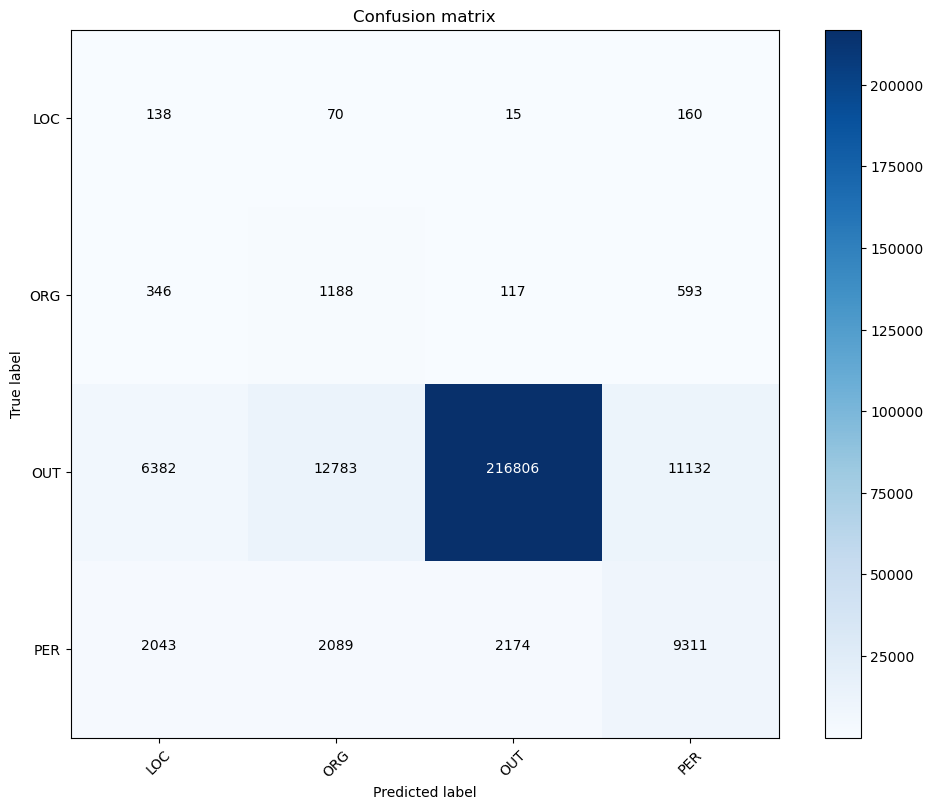

In [55]:
cnf_matrix = confusion_matrix(df_words.nltk_tags, df_words.tag)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['LOC', 'ORG', 'OUT', 'PER'],
                      title='Confusion matrix')

Ну на матрице визуально видно то же самое, что и из отчета классификации.

## SPACY

In [56]:
!pip install -U spacy
!python -m spacy info

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.2/12.2 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 48.9/48.9 kB 821.7 kB/s eta 0:00:00
     -------------------------------------- 482.8/482.8 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 2.4 MB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



============================== Info about spaCy ==============================

spaCy version    3.5.2                         
Location         C:\Users\Marat\AppData\Roaming\Python\Python39\site-packages\spacy
Platform         Windows-10-10.0.19044-SP0     
Python version   3.9.13                        
Pipelines                                      



In [57]:
!python -m spacy download ru_core_news_md

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 41.9/41.9 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 480.4 kB/s eta 0:00:00
     ---------------------------------------- 8.4/8.4 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [58]:
import spacy
from spacy import displacy

In [59]:
records = load_ne5(dir)
document = next(records).text
nlp = spacy.load('ru_core_news_md')
doc = nlp(document)

displacy.render(doc, jupyter=True, style="dep")
displacy.render(doc, jupyter=True, style="ent")

В целом неплохо, но в этом примере имя часто путается с организацией

## NN

In [60]:
df_words.head(10)

,word,tag,nltk_tags
0,Комиссар,OUT,PER
1,СЕ,ORG,ORG
2,критикует,OUT,OUT
3,ограничительную,OUT,OUT
4,политику,OUT,OUT
5,в,OUT,OUT
6,отношении,OUT,OUT
7,беженцев,OUT,OUT
8,в,OUT,OUT
9,европейских,OUT,OUT


In [61]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, GRU, LSTM, Dropout, Input
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [62]:
from sklearn import model_selection, preprocessing, linear_model

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_words['word'], df_words['tag'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [63]:
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_data = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

In [64]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [65]:
def custom_standardization(input_data):
        return input_data

def data_prep(train_data, seq_len=1, vocab_size = 30000):    
    
    vocab_size = 30000
    #seq_len = 1

    vectorize_layer = TextVectorization(
        standardize=custom_standardization,
        max_tokens=vocab_size,
        output_mode='int',
        output_sequence_length=seq_len)


    # Make a text-only dataset (no labels) and call adapt to build the vocabulary.
    text_data = train_data.map(lambda x, y: x)
    vectorize_layer.adapt(text_data)
    return vectorize_layer

In [66]:
embedding_dim = 64

class modelNER(tf.keras.Model):
    def __init__(self):
        super(modelNER, self).__init__()
        self.emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gPool = tf.keras.layers.GlobalMaxPooling1D()
        self.fc1 = tf.keras.layers.Dense(300, activation='relu')
        self.fc2 = tf.keras.layers.Dense(50, activation='relu')
        self.fc3 = tf.keras.layers.Dense(len(df_words['tag'].value_counts()), activation='softmax')

    def call(self, x):
        x = vectorize_layer(x)
        x = self.emb(x)
        pool_x = self.gPool(x)
        
        fc_x = self.fc1(pool_x)
        fc_x = self.fc2(fc_x)
        
        concat_x = tf.concat([pool_x, fc_x], axis=1)
        return self.fc3(concat_x)

In [67]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report


class Metrics(Callback):


    def on_epoch_end(self, epoch, logs=None):
        val_predict = model.predict(valid_data).argmax(axis=1)
        print('\n', classification_report(valid_y, val_predict, target_names=encoder.classes_))
        cnf_matrix = confusion_matrix(val_predict, valid_y)
        plt.figure(figsize=(10, 8))
        plot_confusion_matrix(cnf_matrix, classes=encoder.classes_,
                              title='Confusion matrix')
        


Обучим 3 сетки подставляя один токен, а также 3 и 5:

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Epoch 1/2
4147/4147 [==============================] - 19s 4ms/step

               precision    recall  f1-score   support

         LOC       0.88      0.86      0.87      2228
         ORG       0.91      0.58      0.71      4040
         OUT       0.94      0.99      0.97     54802
         PER       0.96      0.71      0.82      5267

    accuracy                           0.94     66337
   macro avg       0.92      0.78      0.84     66337
weighted avg       0.94      0.94      0.94     66337

Confusion matrix, without normalization
12439/12439 [==============================] - 1638s 131ms/step - loss: 0.2594 - accuracy: 0.9206 - val_loss: 0.1948 - val_accuracy: 0.9406
Epoch 2/2
4147/4147 [==============================] - 19s 4ms/step

               precision    recall  f1-score 

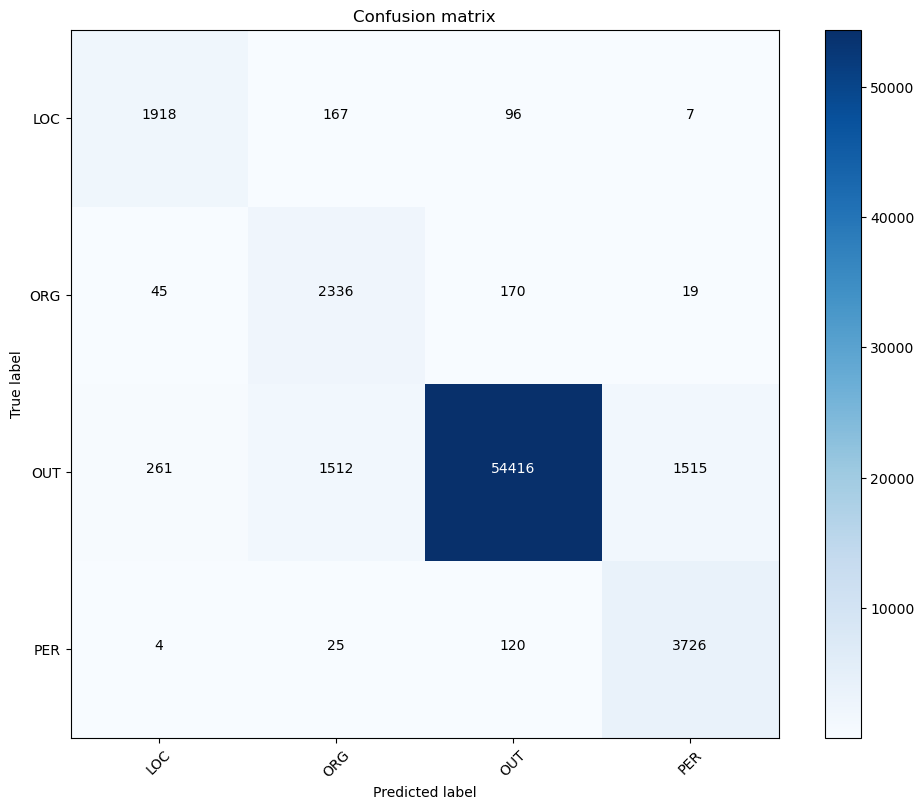

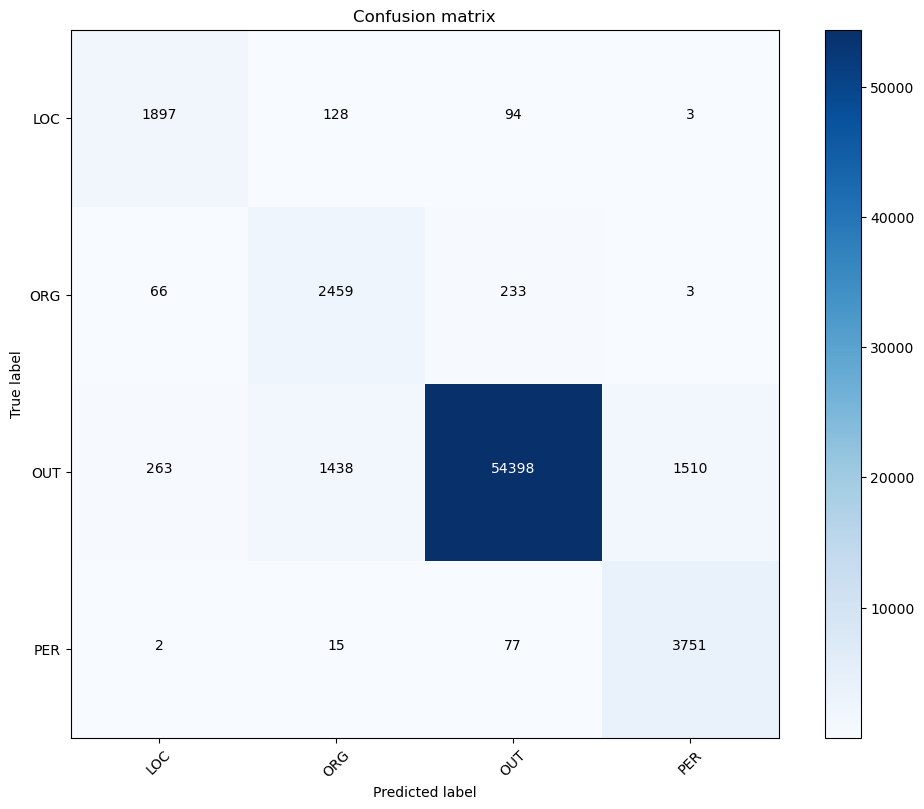

In [68]:
vocab_size = 30000
vectorize_layer = data_prep(train_data, seq_len = 1, vocab_size = vocab_size)


model = modelNER()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_data, validation_data=valid_data, epochs=2, callbacks=[Metrics()])

Epoch 1/2
4147/4147 [==============================] - 19s 5ms/step

               precision    recall  f1-score   support

         LOC       0.89      0.84      0.87      2228
         ORG       0.89      0.59      0.71      4040
         OUT       0.97      0.92      0.94     54802
         PER       0.49      0.87      0.63      5267

    accuracy                           0.89     66337
   macro avg       0.81      0.81      0.79     66337
weighted avg       0.92      0.89      0.90     66337

Confusion matrix, without normalization
12439/12439 [==============================] - 1643s 132ms/step - loss: 0.2673 - accuracy: 0.9174 - val_loss: 0.2131 - val_accuracy: 0.8924
Epoch 2/2
4147/4147 [==============================] - 21s 5ms/step

               precision    recall  f1-score   support

         LOC       0.90      0.85      0.87      2228
         ORG       0.90      0.60      0.72      4040
         OUT       0.97      0.92      0.94     54802
         PER       0.49     

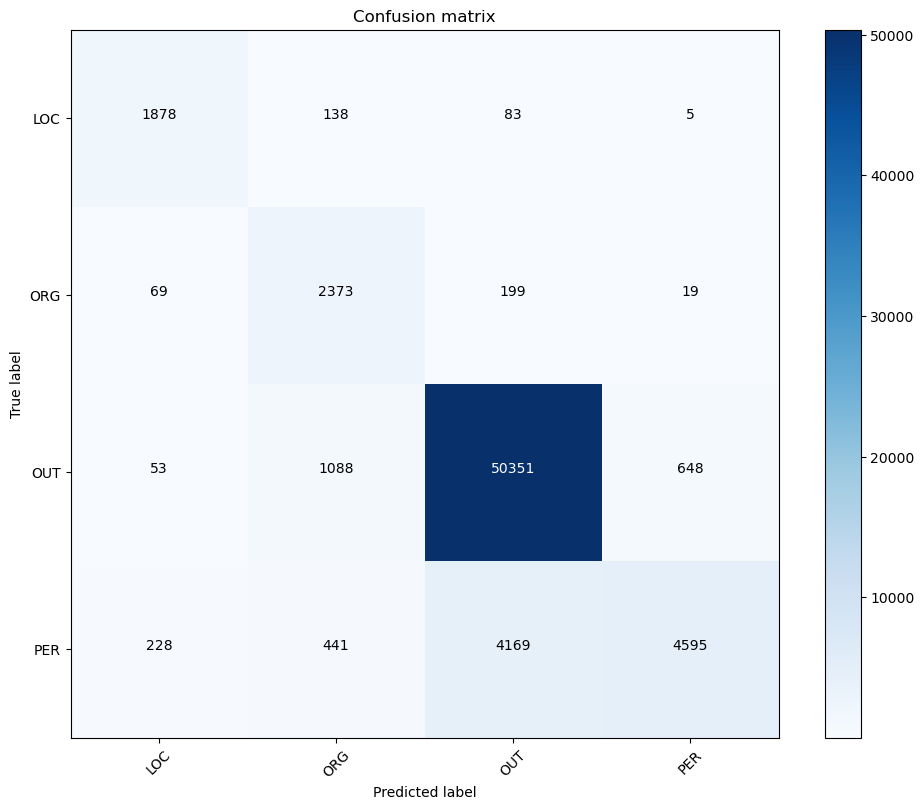

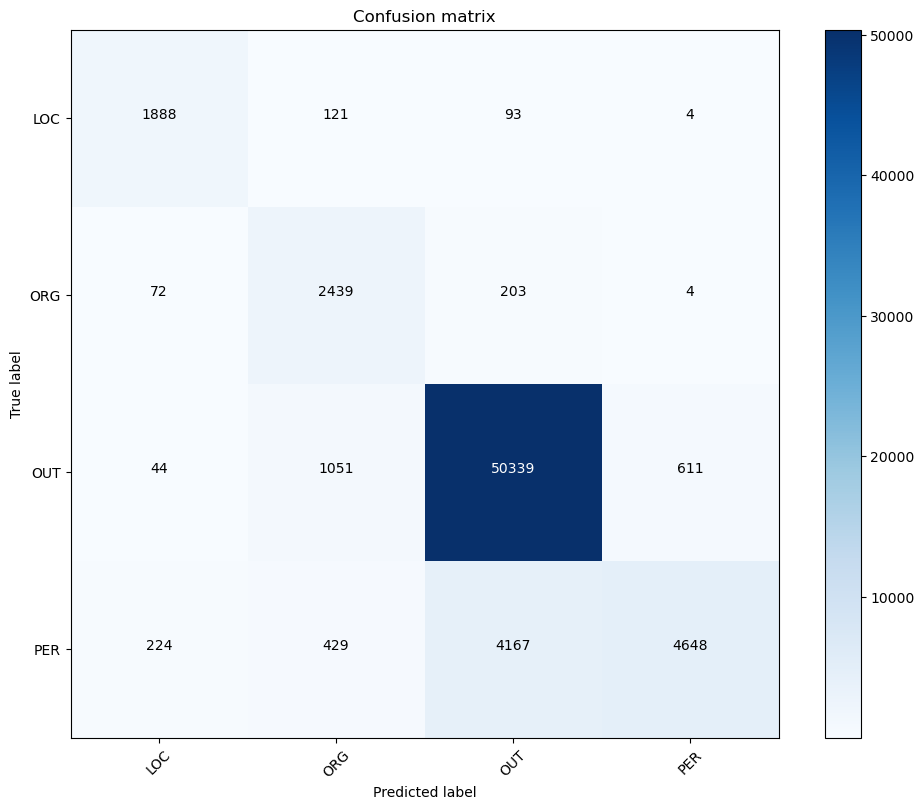

In [69]:
vectorize_layer = data_prep(train_data, seq_len = 3, vocab_size = vocab_size)


model = modelNER()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
hist = model.fit(train_data, validation_data=valid_data, epochs=2, callbacks=[Metrics()])

Epoch 1/2
4147/4147 [==============================] - 19s 5ms/step

               precision    recall  f1-score   support

         LOC       0.88      0.86      0.87      2228
         ORG       0.92      0.57      0.71      4040
         OUT       0.94      0.99      0.97     54802
         PER       0.97      0.69      0.81      5267

    accuracy                           0.94     66337
   macro avg       0.93      0.78      0.84     66337
weighted avg       0.94      0.94      0.94     66337

Confusion matrix, without normalization
12439/12439 [==============================] - 1640s 132ms/step - loss: 0.2674 - accuracy: 0.9177 - val_loss: 0.1942 - val_accuracy: 0.9403
Epoch 2/2
4147/4147 [==============================] - 21s 5ms/step

               precision    recall  f1-score   support

         LOC       0.89      0.85      0.87      2228
         ORG       0.89      0.61      0.72      4040
         OUT       0.97      0.92      0.94     54802
         PER       0.49     

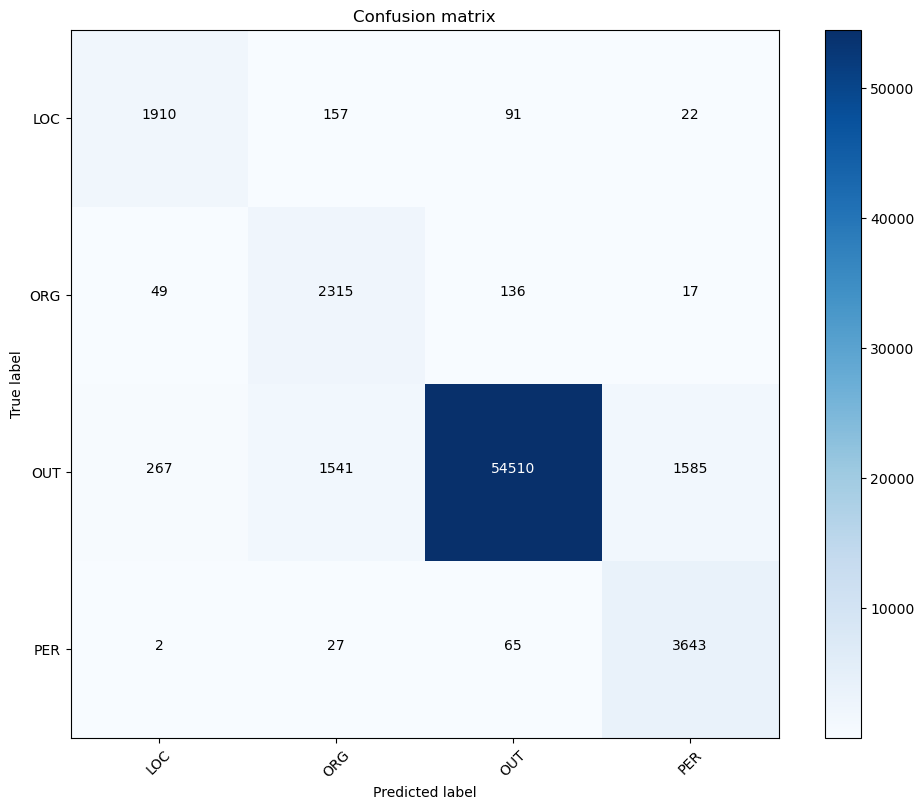

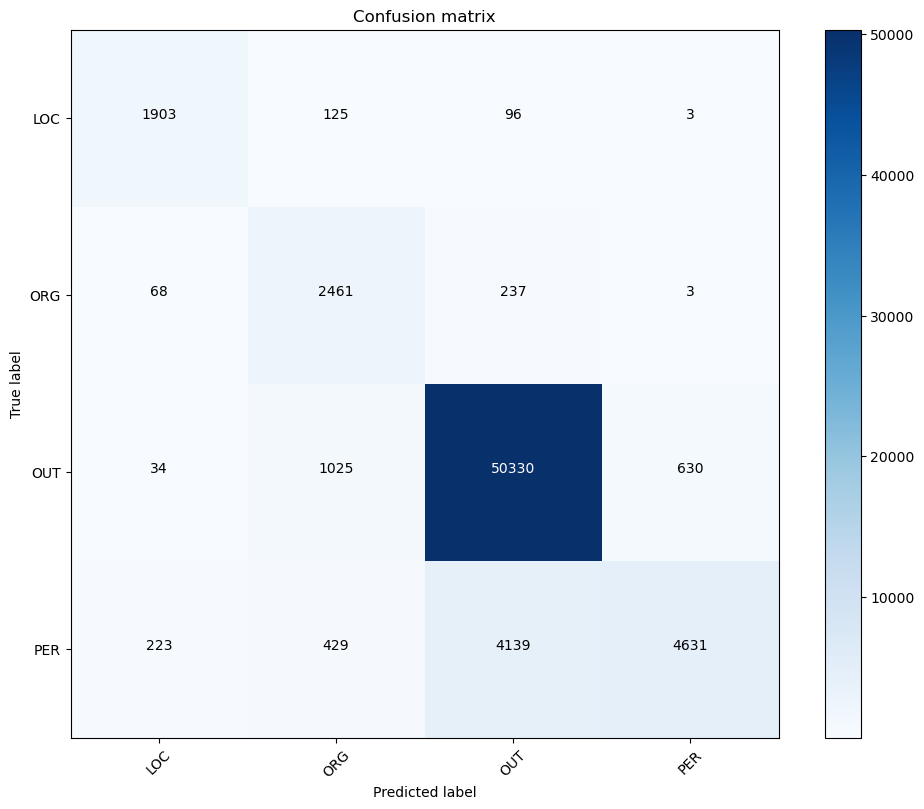

In [70]:
vocab_size = 30000
vectorize_layer = data_prep(train_data, seq_len = 5, vocab_size = vocab_size)


model = modelNER()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
hist = model.fit(train_data, validation_data=valid_data, epochs=2, callbacks=[Metrics()])

**Выводы:**
- количество токенов особо не влияет на качество классификации. Только при 5 токенах сеть на второй эпохе переобучилась и качество упало.
- Результаты достаточно неплохие. По сравнению с nltk - точно.
- Хуже всего сеть определяет организации.
